In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

In [45]:
df = pd.ExcelFile('D:/R/facial_panel_data/Panel_data_for_China.xlsx')


In [46]:
panel_data =    df.parse(0)

In [47]:
panel_data.head()

,prov,year,Disgas,fd,popla,inst,volucar,GrowthGDP
0,1,2003,3.352385,0.897847,6.764595,0.297002,5.599014,3.291698
1,1,2004,3.391147,0.908318,6.789689,0.307229,5.728930,3.314435
2,1,2005,3.339322,0.911130,6.819385,0.290768,5.883434,3.187040
3,1,2006,3.858622,0.914212,6.859530,0.269954,6.029146,2.981870
4,1,2007,3.844708,0.919127,6.905312,0.254844,6.176491,2.955008


In [48]:
panel_data

,prov,year,Disgas,fd,popla,inst,volucar,GrowthGDP
0,1,2003,3.352385,0.897847,6.764595,0.297002,5.599014,3.291698
1,1,2004,3.391147,0.908318,6.789689,0.307229,5.728930,3.314435
2,1,2005,3.339322,0.911130,6.819385,0.290768,5.883434,3.187040
3,1,2006,3.858622,0.914212,6.859530,0.269954,6.029146,2.981870
4,1,2007,3.844708,0.919127,6.905312,0.254844,6.176491,2.955008
5,1,2008,3.591253,0.916737,6.960446,0.236294,6.324269,2.697014
6,1,2009,3.587640,0.916022,7.009478,0.234966,6.499291,2.578284
7,1,2010,3.697237,0.920726,7.062866,0.240079,6.710803,2.416200
8,1,2011,3.560283,0.929148,7.091504,0.230894,6.754394,2.267144
9,1,2012,3.520976,0.927814,7.115967,0.227036,6.801405,2.212093


In [49]:
panel_data.describe()

,prov,year,Disgas,fd,popla,inst,volucar,GrowthGDP
count,330.000000,330.00000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,15.500000,2008.00000,4.920663,0.792509,5.412108,0.472866,5.408389,1.120771
std,8.668586,3.16708,0.829269,0.081294,1.254841,0.076314,1.028508,0.642967
min,1.000000,2003.00000,1.481605,0.563511,2.003730,0.216787,2.678965,0.346344
25%,8.000000,2005.00000,4.628631,0.734124,4.983409,0.434613,4.719118,0.719943
50%,15.500000,2008.00000,5.081151,0.799664,5.633351,0.487342,5.451865,0.874467
75%,23.000000,2011.00000,5.489704,0.850870,6.226029,0.526272,6.130227,1.350684
max,30.000000,2013.00000,6.117129,0.935882,8.140858,0.590454,7.713901,3.736935


In [50]:
panel_data.Disgas.head()

0    3.352385
1    3.391147
2    3.339322
3    3.858622
4    3.844708
Name: Disgas, dtype: float64

In [51]:
df = panel_data

In [52]:
df.head()

,prov,year,Disgas,fd,popla,inst,volucar,GrowthGDP
0,1,2003,3.352385,0.897847,6.764595,0.297002,5.599014,3.291698
1,1,2004,3.391147,0.908318,6.789689,0.307229,5.728930,3.314435
2,1,2005,3.339322,0.911130,6.819385,0.290768,5.883434,3.187040
3,1,2006,3.858622,0.914212,6.859530,0.269954,6.029146,2.981870
4,1,2007,3.844708,0.919127,6.905312,0.254844,6.176491,2.955008


In [11]:
df.describe()

,prov,year,Disgas,fd,popla,inst,volucar,GrowthGDP
count,330.000000,330.00000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,15.500000,2008.00000,4.920663,0.792509,5.412108,0.472866,5.408389,1.120771
std,8.668586,3.16708,0.829269,0.081294,1.254841,0.076314,1.028508,0.642967
min,1.000000,2003.00000,1.481605,0.563511,2.003730,0.216787,2.678965,0.346344
25%,8.000000,2005.00000,4.628631,0.734124,4.983409,0.434613,4.719118,0.719943
50%,15.500000,2008.00000,5.081151,0.799664,5.633351,0.487342,5.451865,0.874467
75%,23.000000,2011.00000,5.489704,0.850870,6.226029,0.526272,6.130227,1.350684
max,30.000000,2013.00000,6.117129,0.935882,8.140858,0.590454,7.713901,3.736935


In [12]:
df.Disgas.head()

0    3.352385
1    3.391147
2    3.339322
3    3.858622
4    3.844708
Name: Disgas, dtype: float64

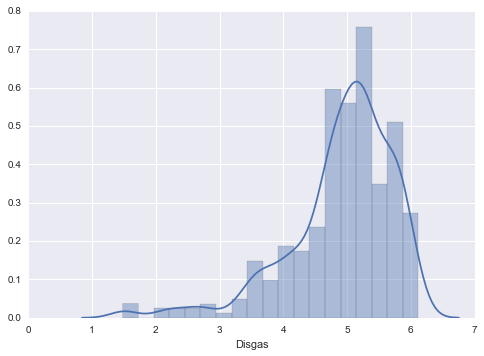

In [13]:
sns.distplot(df.Disgas);

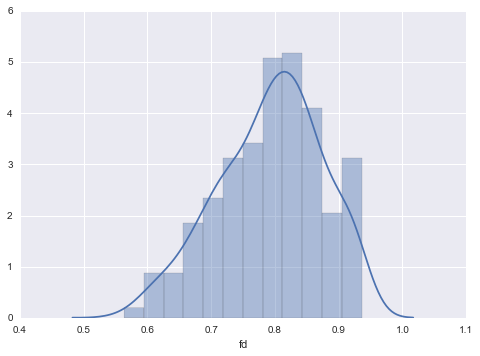

In [14]:
sns.distplot(df.fd)

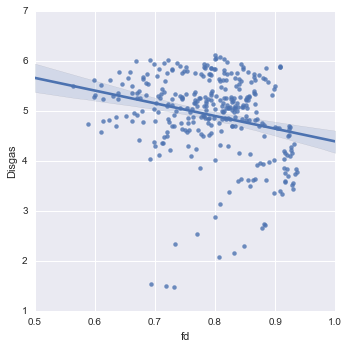

In [15]:
sns.lmplot(x="fd", y="Disgas", data=df,
           lowess=False);

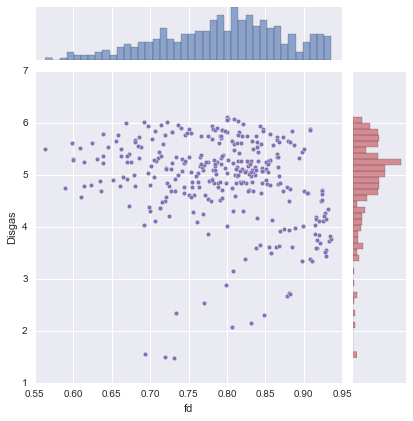

In [16]:
import numpy as np
g = sns.JointGrid(x="fd", y="Disgas", data=df )
g = g.plot_joint(plt.scatter, color="m", edgecolor="white")
#g = g.plot(sns.regplot)
_ = g.ax_marg_x.hist(df["fd"], color="b", alpha=.6,
                   bins = 40 )
_ = g.ax_marg_y.hist(df["Disgas"], color="r", alpha=.6,
                      orientation="horizontal",
                   bins = 40  )

# kde plot
#sns.jointplot(x="fd", y="Disgas", data=df, kind="kde")
#g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
#g = g.plot_marginals(sns.kdeplot, shade=True)

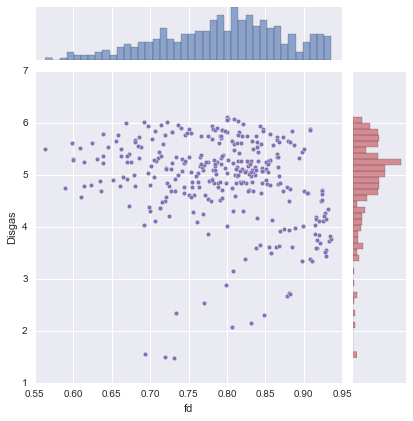

In [17]:
import numpy as np
g = sns.JointGrid(x="fd", y="Disgas", data=df)
g = g.plot_joint(plt.scatter, color="m", edgecolor="white")
#g = g.plot(sns.regplot)
_ = g.ax_marg_x.hist(df["fd"], color="b", alpha=.6,
                   bins = 40 )
_ = g.ax_marg_y.hist(df["Disgas"], color="r", alpha=.6,
                      orientation="horizontal",
                   bins = 40  )

In [18]:
df.describe()

,prov,year,Disgas,fd,popla,inst,volucar,GrowthGDP
count,330.000000,330.00000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,15.500000,2008.00000,4.920663,0.792509,5.412108,0.472866,5.408389,1.120771
std,8.668586,3.16708,0.829269,0.081294,1.254841,0.076314,1.028508,0.642967
min,1.000000,2003.00000,1.481605,0.563511,2.003730,0.216787,2.678965,0.346344
25%,8.000000,2005.00000,4.628631,0.734124,4.983409,0.434613,4.719118,0.719943
50%,15.500000,2008.00000,5.081151,0.799664,5.633351,0.487342,5.451865,0.874467
75%,23.000000,2011.00000,5.489704,0.850870,6.226029,0.526272,6.130227,1.350684
max,30.000000,2013.00000,6.117129,0.935882,8.140858,0.590454,7.713901,3.736935


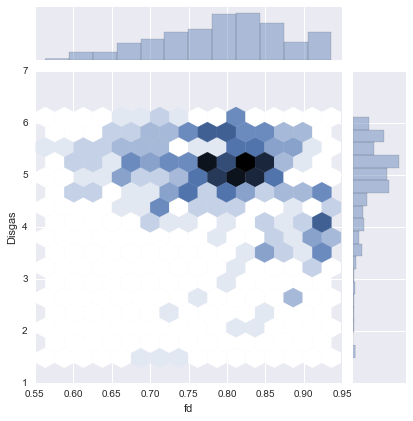

In [19]:
g = (sns.jointplot(x="fd", y="Disgas", data=df, kind="hex", stat_func=None)
        .set_axis_labels("fd", "Disgas"))

AttributeError: 'module' object has no attribute 'savefig'

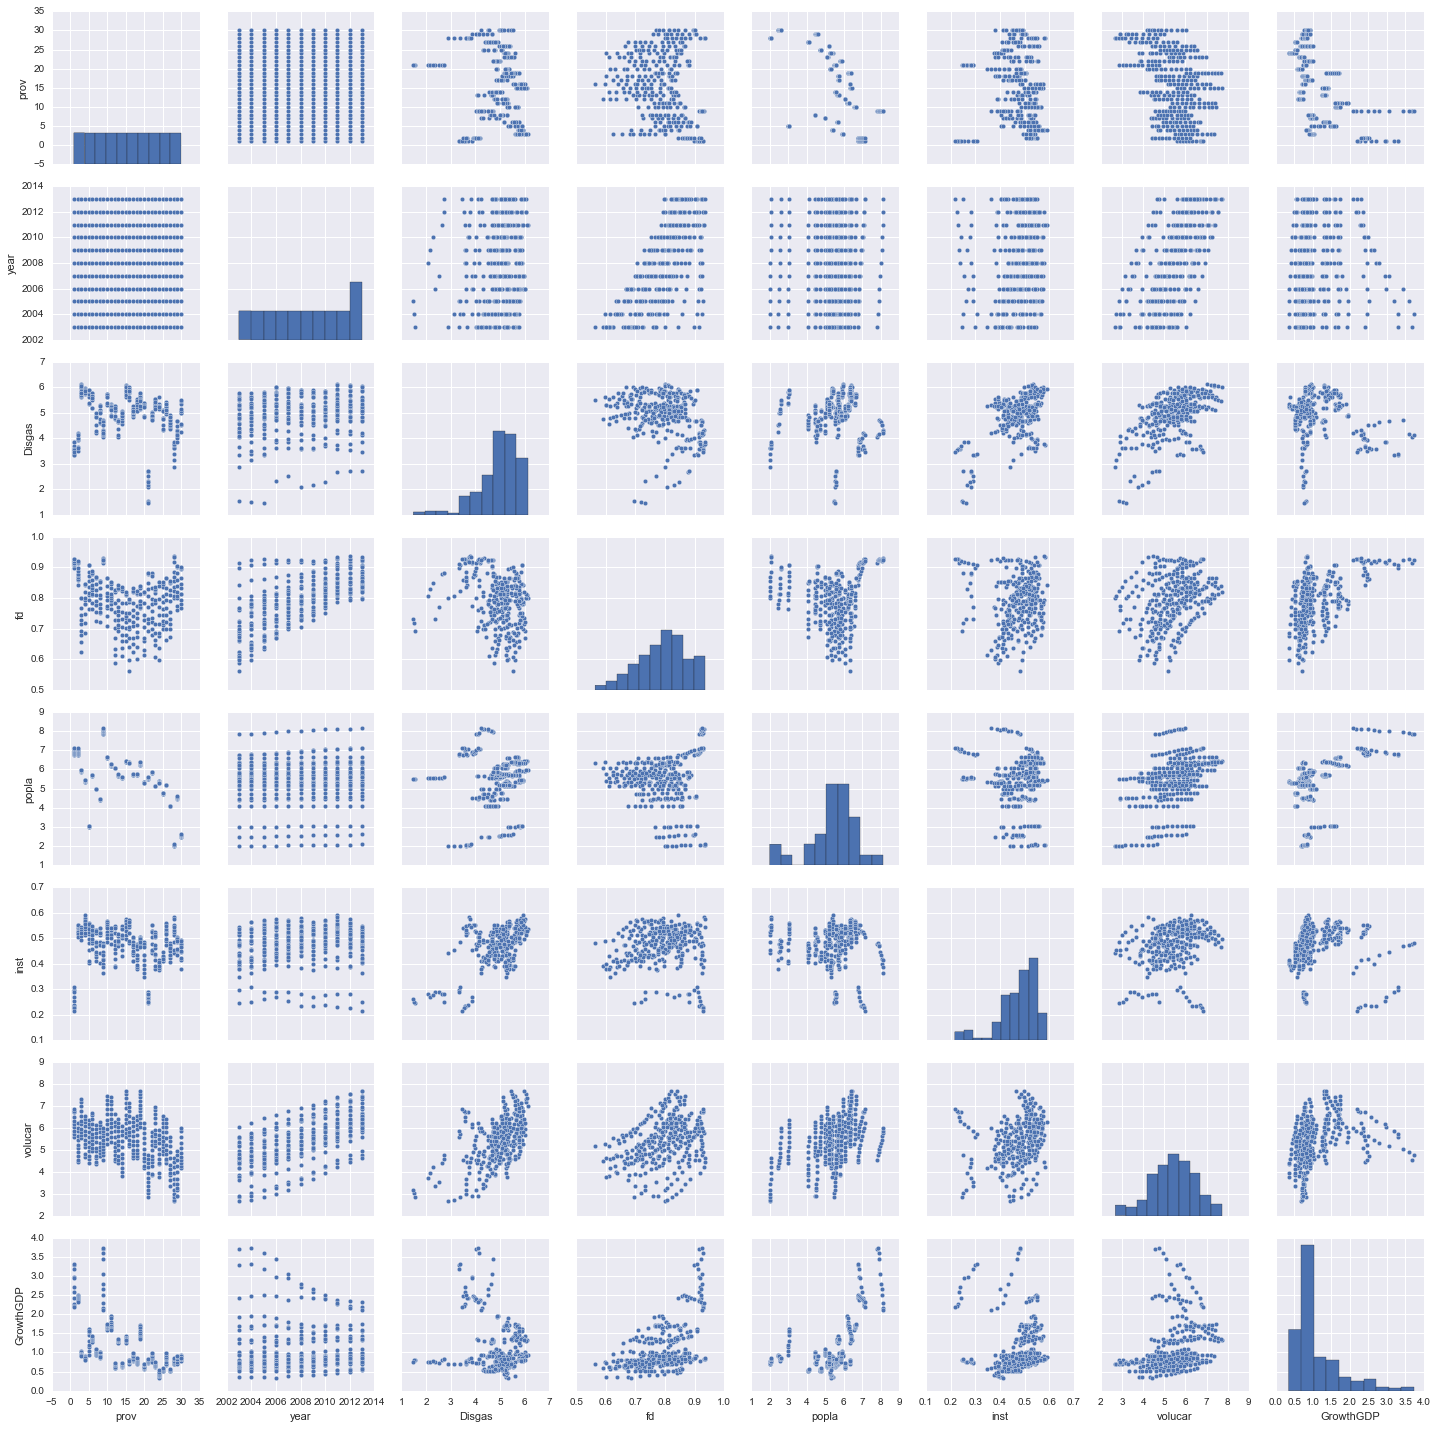

In [20]:
sns.pairplot(df)


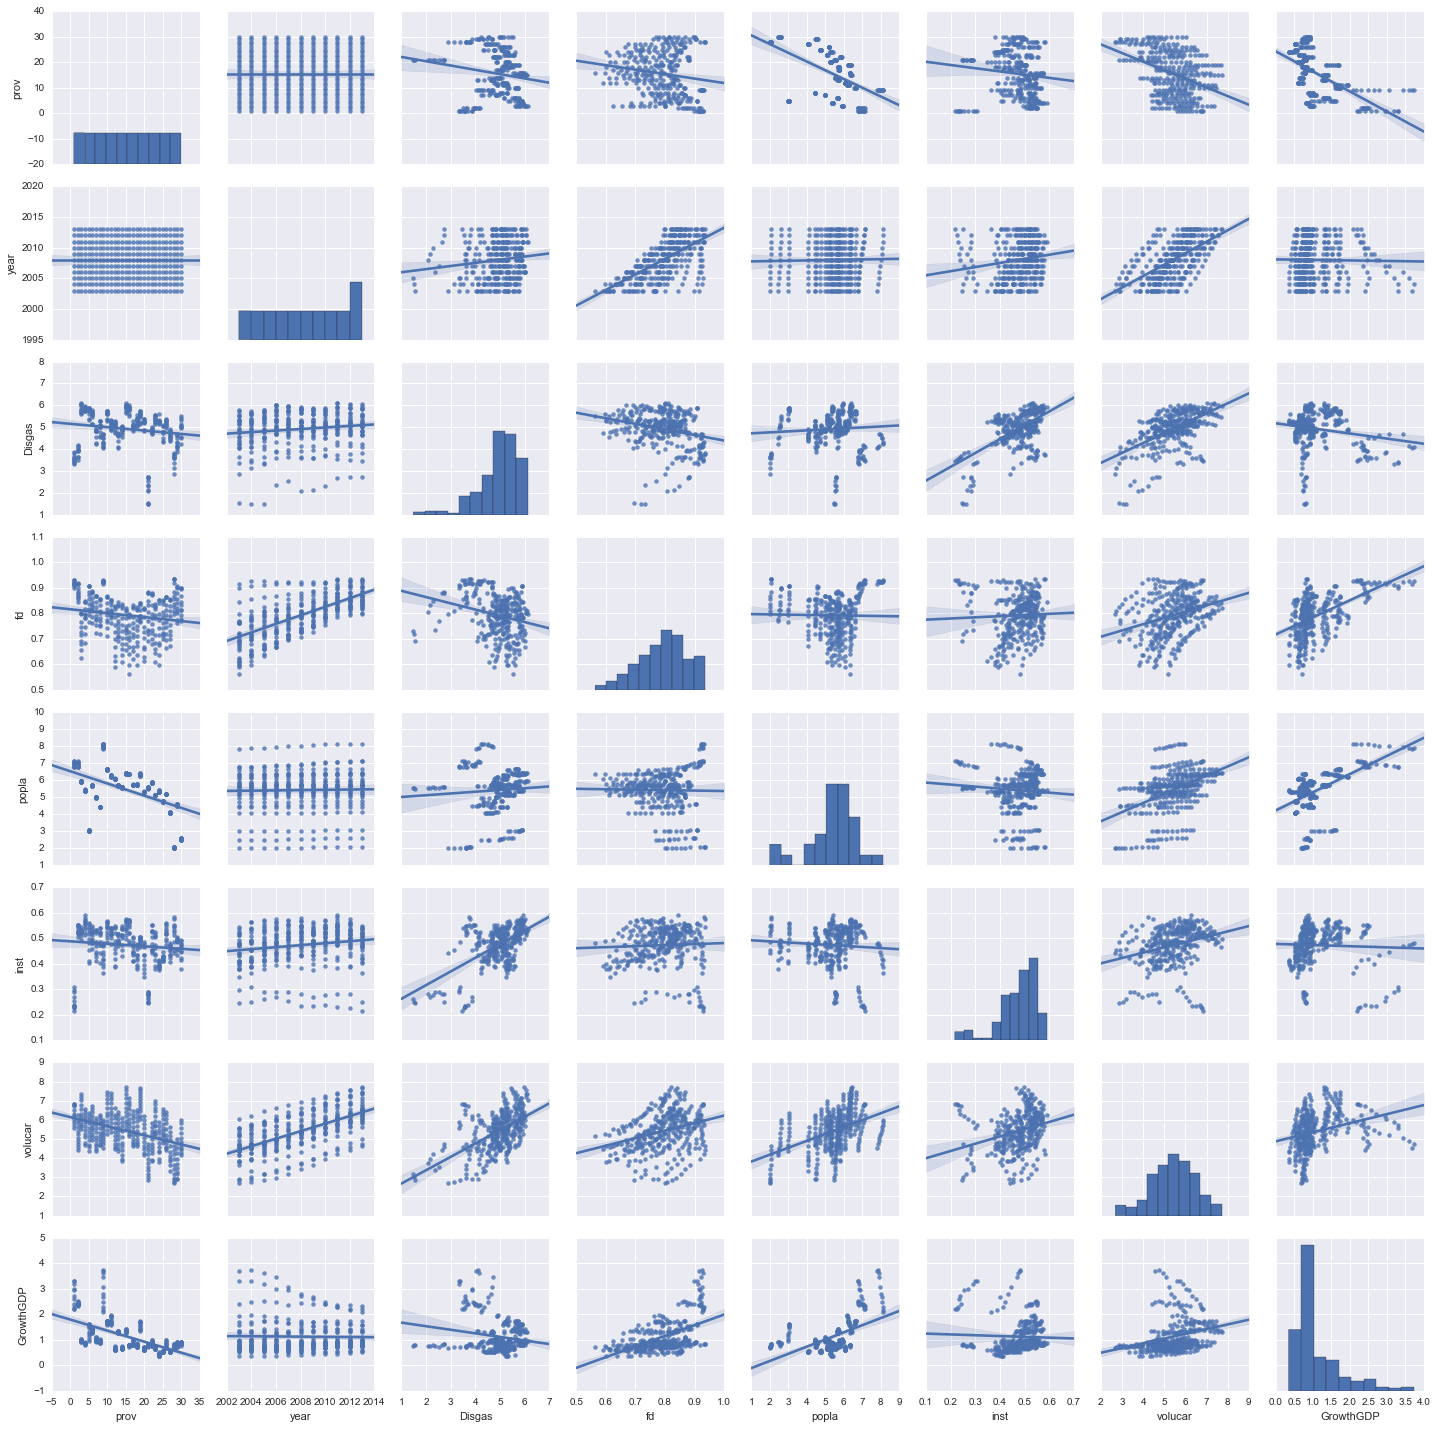

In [21]:
g = sns.pairplot(df, kind="reg")

In [41]:
type(df)

pandas.core.frame.DataFrame

In [42]:
df.year.head()

AttributeError: 'DataFrame' object has no attribute 'year'

In [24]:
df.year = df.year.astype('category')

In [25]:
df.year.head()

0    2003
1    2004
2    2005
3    2006
4    2007
Name: year, dtype: category
Categories (11, int64): [2003, 2004, 2005, 2006, ..., 2010, 2011, 2012, 2013]

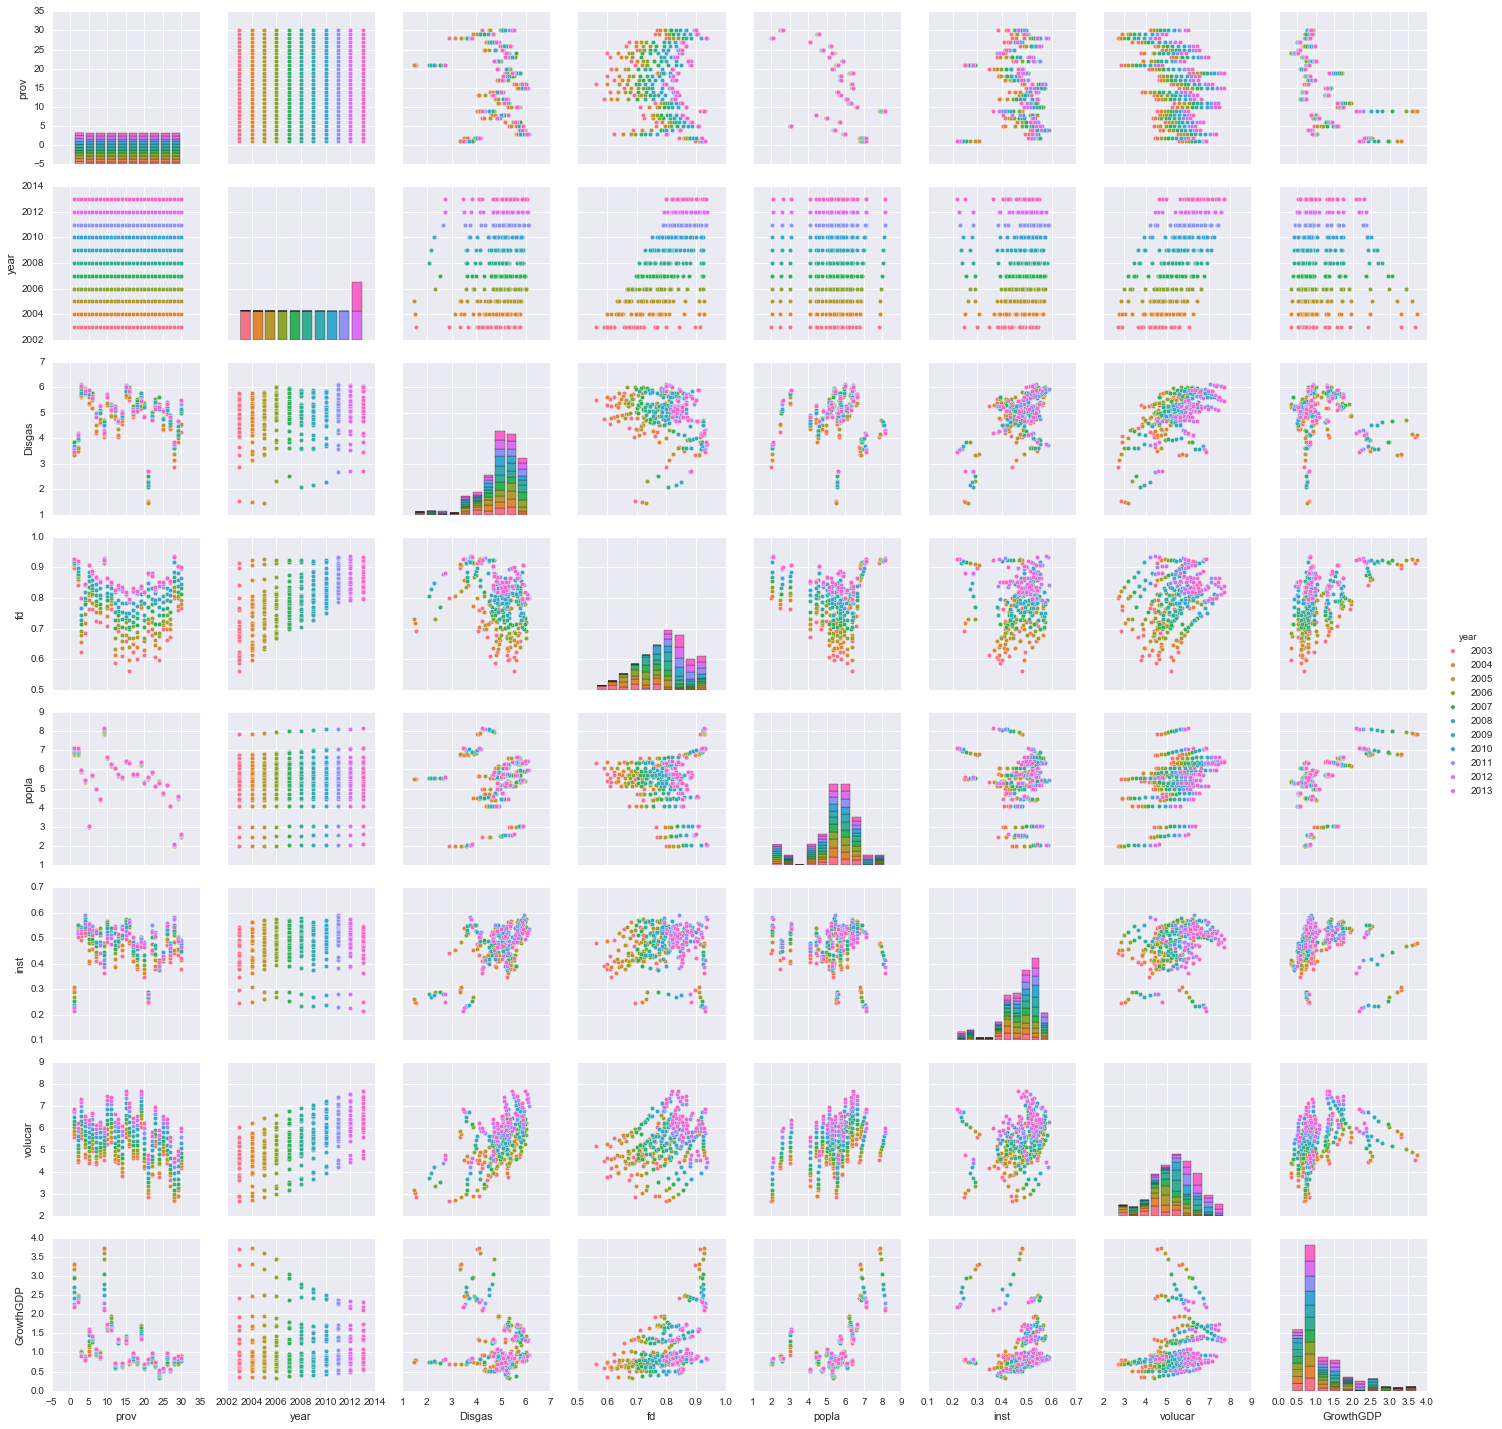

In [26]:

g = sns.pairplot(df, hue="year")

In [27]:
df1 = df

In [28]:
df1.head()

,prov,year,Disgas,fd,popla,inst,volucar,GrowthGDP
0,1,2003,3.352385,0.897847,6.764595,0.297002,5.599014,3.291698
1,1,2004,3.391147,0.908318,6.789689,0.307229,5.728930,3.314435
2,1,2005,3.339322,0.911130,6.819385,0.290768,5.883434,3.187040
3,1,2006,3.858622,0.914212,6.859530,0.269954,6.029146,2.981870
4,1,2007,3.844708,0.919127,6.905312,0.254844,6.176491,2.955008


In [29]:
df1.drop(df1.columns[[0, 4,5,6,7]], axis=1, inplace=True)

In [30]:
df1.head()

,year,Disgas,fd
0,2003,3.352385,0.897847
1,2004,3.391147,0.908318
2,2005,3.339322,0.911130
3,2006,3.858622,0.914212
4,2007,3.844708,0.919127


In [31]:
df1.year.head()

0    2003
1    2004
2    2005
3    2006
4    2007
Name: year, dtype: category
Categories (11, int64): [2003, 2004, 2005, 2006, ..., 2010, 2011, 2012, 2013]

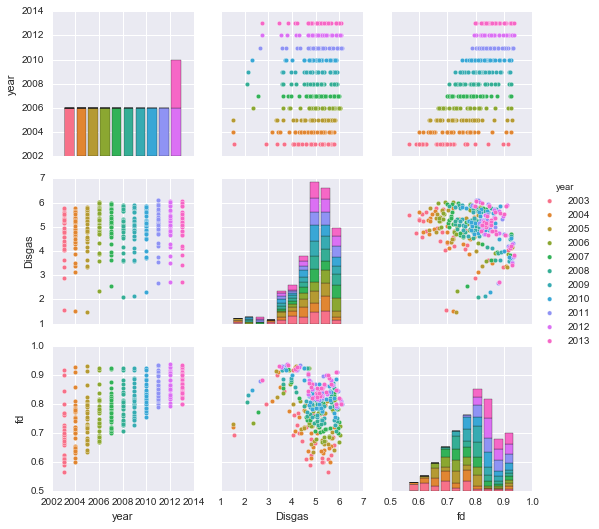

In [32]:
g = sns.pairplot(df1, hue="year")

In [33]:
df2 = df1


In [34]:
df2.head()

,year,Disgas,fd
0,2003,3.352385,0.897847
1,2004,3.391147,0.908318
2,2005,3.339322,0.911130
3,2006,3.858622,0.914212
4,2007,3.844708,0.919127


In [35]:
df2.drop(df2.columns[[0]], axis=1, inplace=True)

In [36]:
df2.head()

,Disgas,fd
0,3.352385,0.897847
1,3.391147,0.908318
2,3.339322,0.911130
3,3.858622,0.914212
4,3.844708,0.919127


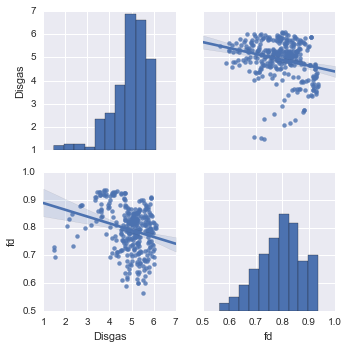

In [37]:
g = sns.pairplot(df2, kind="reg")

In [56]:
type(df)

pandas.core.frame.DataFrame

In [57]:
df.year.head()

0    2003
1    2004
2    2005
3    2006
4    2007
Name: year, dtype: int64

In [58]:
df.head(3)

,prov,year,Disgas,fd,popla,inst,volucar,GrowthGDP
0,1,2003,3.352385,0.897847,6.764595,0.297002,5.599014,3.291698
1,1,2004,3.391147,0.908318,6.789689,0.307229,5.728930,3.314435
2,1,2005,3.339322,0.911130,6.819385,0.290768,5.883434,3.187040


In [61]:
df.shape

(330, 8)

In [62]:
df.describe()

,prov,year,Disgas,fd,popla,inst,volucar,GrowthGDP
count,330.000000,330.00000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,15.500000,2008.00000,4.920663,0.792509,5.412108,0.472866,5.408389,1.120771
std,8.668586,3.16708,0.829269,0.081294,1.254841,0.076314,1.028508,0.642967
min,1.000000,2003.00000,1.481605,0.563511,2.003730,0.216787,2.678965,0.346344
25%,8.000000,2005.00000,4.628631,0.734124,4.983409,0.434613,4.719118,0.719943
50%,15.500000,2008.00000,5.081151,0.799664,5.633351,0.487342,5.451865,0.874467
75%,23.000000,2011.00000,5.489704,0.850870,6.226029,0.526272,6.130227,1.350684
max,30.000000,2013.00000,6.117129,0.935882,8.140858,0.590454,7.713901,3.736935


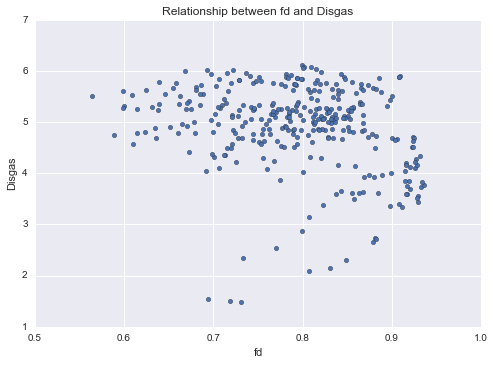

In [63]:
plt.scatter(df.fd, df.Disgas)
plt.xlabel("fd")
plt.ylabel("Disgas")
plt.title("Relationship between fd and Disgas")

# Fitting Linear Regression using sklearn

In [65]:
from sklearn.linear_model import LinearRegression
X = df.drop('Disgas', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Fit a linear model

In [66]:
lm.fit(X, df.Disgas)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Estimated intercept and coefficients

In [67]:
print 'Estimated intercept coefficient:', lm.intercept_

Estimated intercept coefficient: 144.498422292


In [68]:
print 'Number of coefficients:', len(lm.coef_)

Number of coefficients: 7


In [69]:
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,prov,-0.004060
1,year,-0.070861
2,fd,-2.322766
3,popla,-0.100980
4,inst,4.168807
5,volucar,0.651592
6,GrowthGDP,-0.297518


# Residual sum of squares

Let's calculate the residual sum of squares 

$$ S = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - (\beta_0 + \beta_1 x_i))^2 $$

In [76]:
print np.sum((df.Disgas - lm.predict(X)) ** 2)

59.6394061693


#### Mean squared error

In [78]:
mseFull = np.mean((df.Disgas - lm.predict(X)) ** 2)
print mseFull

0.18072547324


# Predict Prices

### Predict Disgas

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{7} $$

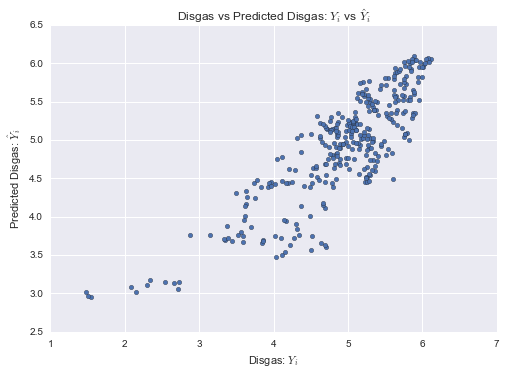

In [71]:
 plt.scatter(df.Disgas, lm.predict(X))
 plt.xlabel("Disgas: $Y_i$")
 plt.ylabel("Predicted Disgas: $\hat{Y}_i$")
plt.title("Disgas vs Predicted Disgas: $Y_i$ vs $\hat{Y}_i$")

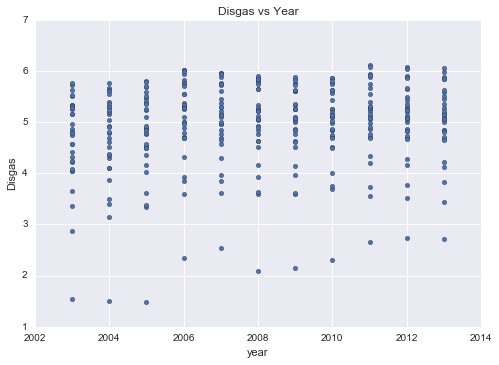

In [72]:
 plt.scatter(df.year, df.Disgas)
 plt.xlabel("year")
 plt.ylabel("Disgas")
plt.title("Disgas vs Year")

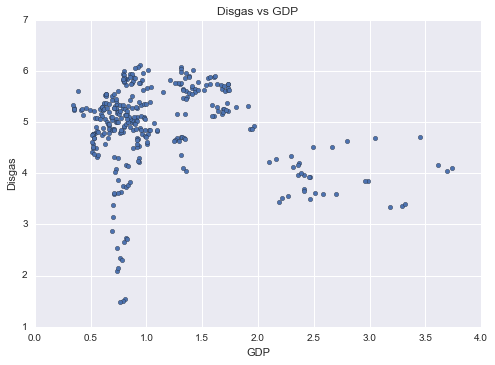

In [73]:
 plt.scatter(df.GrowthGDP, df.Disgas)
 plt.xlabel("GDP")
 plt.ylabel("Disgas")
plt.title("Disgas vs GDP")

In [74]:
df.inst.describe()

count    330.000000
mean       0.472866
std        0.076314
min        0.216787
25%        0.434613
50%        0.487342
75%        0.526272
max        0.590454
Name: inst, dtype: float64